In [23]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.data.shape)#
print(faces.target_names)
print(faces.images.shape)

(1348, 2914)
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


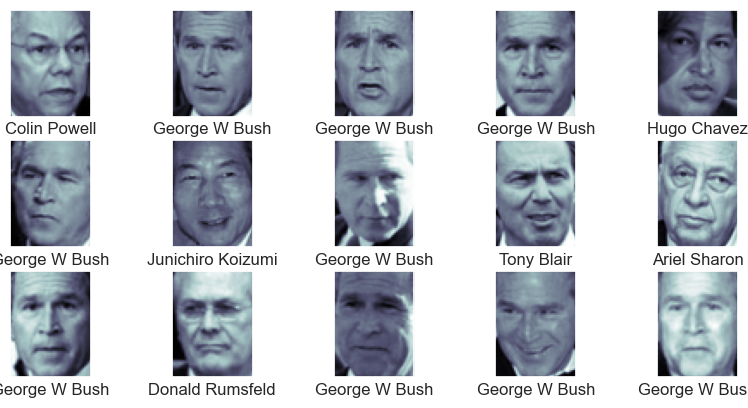

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
fig, ax = plt.subplots(3,5)
fig.subplots_adjust(left=0.0625, right=1.2, wspace=1)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])
plt.show()

#### 使用预处理来提取更有意义的特征。这里使用主成份分析来提取150个基本元素，然后将其提供给支持向量机分类器。
#### 将这个预处理和分类器打包成管道

In [25]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf')
model = make_pipeline(pca, svc)

### 为了测试分类器的训练效果，将数据集分解成训练集和测试集进行交叉检验

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target,
                                                    random_state=42)

### 用网络搜索交叉检验来寻找最优参数组合。通过不断调整C（松弛变量）和参数gamma（控制径向基函数核的大小），确定最优模型

In [27]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
grid = GridSearchCV(model, param_grid)


In [28]:
grid.fit(X_train, y_train)
print(grid.best_estimator_)

Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC(C=1000.0, gamma=0.005))])


In [30]:
model = grid.best_estimator_
y_fit = model.predict(X_test)

Text(0.5, 0.98, '预测错误的名字用红色标注')

/opt/homebrew/anaconda3/envs/pytorch2023/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/anaconda3/envs/pytorch2023/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/anaconda3/envs/pytorch2023/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 38169 (\N{CJK UNIFIED IDEOGRAPH-9519}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/anaconda3/envs/pytorch2023/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 35823 (\N{CJK UNIFIED IDEOGRAPH-8BEF}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/anaconda3/envs/pytorch2023/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.

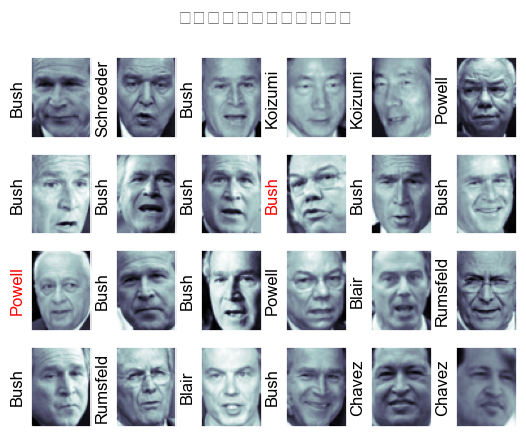

In [31]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[y_fit[i]].split()[-1],
                  color='black' if y_fit[i] == y_test[i] else 'red')
fig.suptitle('预测错误的名字用红色标注', size=14)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_fit,
                           target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.91      0.67      0.77        15
     Colin Powell       0.86      0.88      0.87        68
  Donald Rumsfeld       0.85      0.71      0.77        31
    George W Bush       0.82      0.94      0.88       126
Gerhard Schroeder       0.95      0.78      0.86        23
      Hugo Chavez       1.00      0.65      0.79        20
Junichiro Koizumi       1.00      0.92      0.96        12
       Tony Blair       0.90      0.90      0.90        42

         accuracy                           0.86       337
        macro avg       0.91      0.81      0.85       337
     weighted avg       0.87      0.86      0.86       337



绘制混淆矩阵

Text(110.44999999999996, 0.5, 'predicted label')

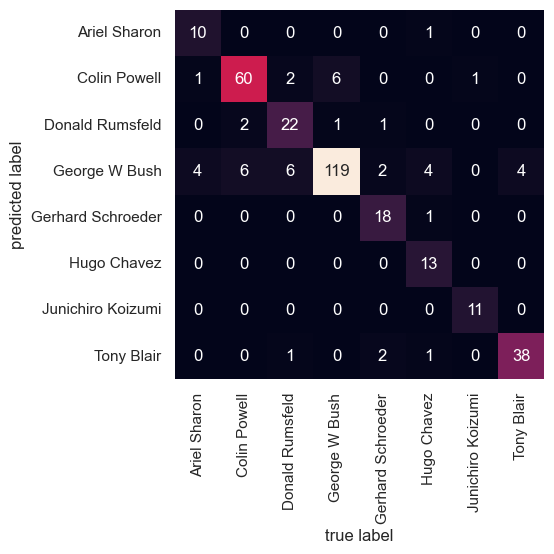

In [33]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_fit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')